In [ ]:
# Lab 1

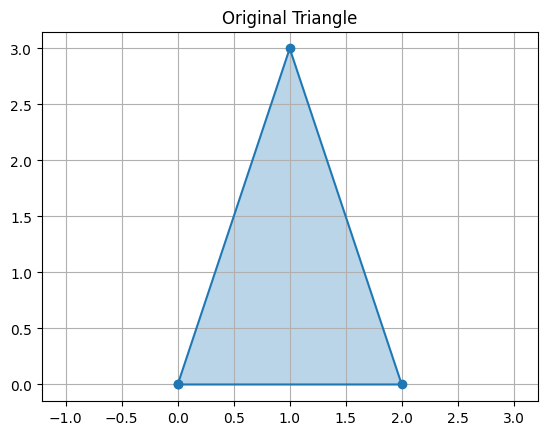

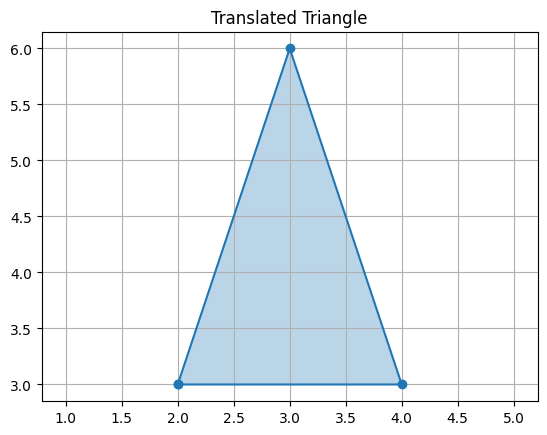

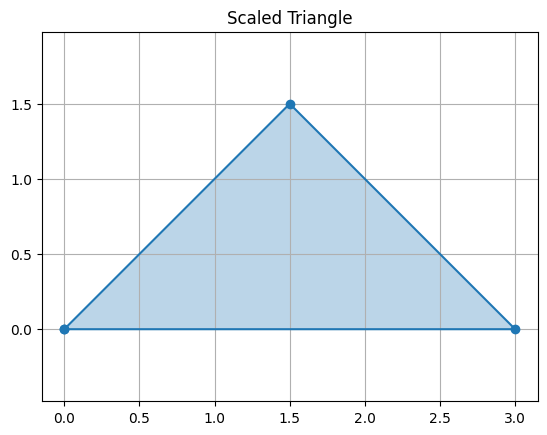

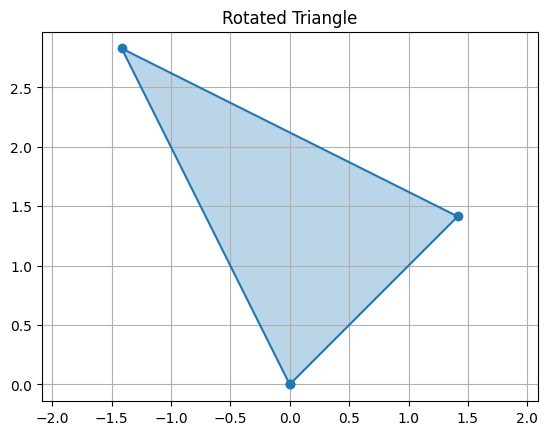

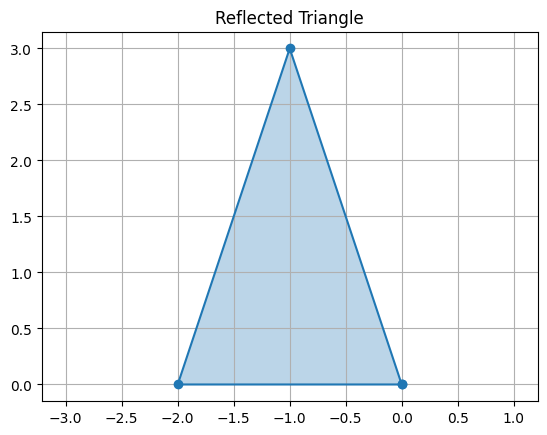

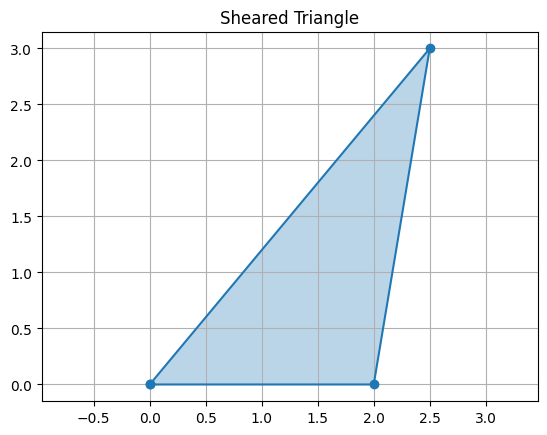

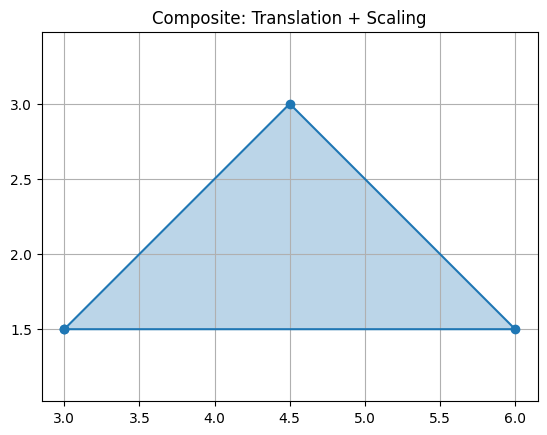

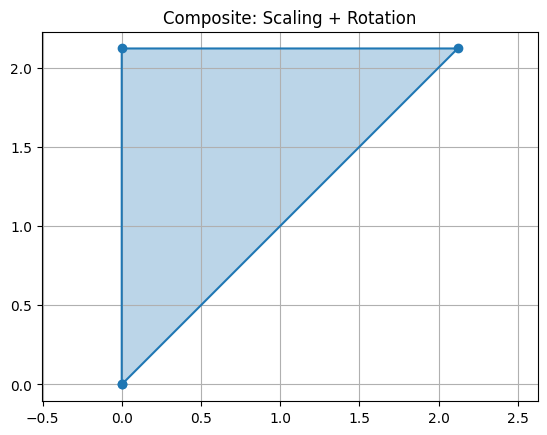

In [ ]:
# Task 1

import numpy as np
import matplotlib.pyplot as plt

triangle = np.array([[0, 0], [2, 0], [1, 3], [0, 0]])

def plot_object(object_points, title='2D Object'):
    plt.plot(object_points[:, 0], object_points[:, 1], marker='o')
    plt.fill(object_points[:, 0], object_points[:, 1], alpha=0.3)
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# 1. Translation
def translate(object_points, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    ones = np.ones((object_points.shape[0], 1))
    object_points_homogeneous = np.hstack((object_points, ones))
    translated_points = (translation_matrix @ object_points_homogeneous.T).T
    return translated_points[:, :2]

# 2. Scaling
def scale(object_points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, 1]])
    ones = np.ones((object_points.shape[0], 1))
    object_points_homogeneous = np.hstack((object_points, ones))
    scaled_points = (scaling_matrix @ object_points_homogeneous.T).T
    return scaled_points[:, :2]

# 3. Rotation
def rotate(object_points, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                                [np.sin(angle_rad), np.cos(angle_rad), 0],
                                [0, 0, 1]])
    ones = np.ones((object_points.shape[0], 1))
    object_points_homogeneous = np.hstack((object_points, ones))
    rotated_points = (rotation_matrix @ object_points_homogeneous.T).T
    return rotated_points[:, :2]

# 4. Reflection (about X-axis)
def reflect_x(object_points):
    reflection_matrix = np.array([[-1, 0, 0],
                                  [0, 1, 0],
                                  [0, 0, 1]])
    ones = np.ones((object_points.shape[0], 1))
    object_points_homogeneous = np.hstack((object_points, ones))
    reflected_points = (reflection_matrix @ object_points_homogeneous.T).T
    return reflected_points[:, :2]

# 5. Shearing (X-shear)
def shear_x(object_points, shear_factor):
    shear_matrix = np.array([[1, shear_factor, 0],
                             [0, 1, 0],
                             [0, 0, 1]])
    ones = np.ones((object_points.shape[0], 1))
    object_points_homogeneous = np.hstack((object_points, ones))
    sheared_points = (shear_matrix @ object_points_homogeneous.T).T
    return sheared_points[:, :2]

# Plot the original object
plot_object(triangle, title="Original Triangle")

# 1. Apply Translation
translated_triangle = translate(triangle, 2, 3)
plot_object(translated_triangle, title="Translated Triangle")

# 2. Apply Scaling
scaled_triangle = scale(triangle, 1.5, 0.5)
plot_object(scaled_triangle, title="Scaled Triangle")

# 3. Apply Rotation
rotated_triangle = rotate(triangle, 45)
plot_object(rotated_triangle, title="Rotated Triangle")

# 4. Apply Reflection
reflected_triangle = reflect_x(triangle)
plot_object(reflected_triangle, title="Reflected Triangle")

# 5. Apply Shearing
sheared_triangle = shear_x(triangle, 0.5)
plot_object(sheared_triangle, title="Sheared Triangle")

# Composite Transformation: Translation + Scaling
composite_triangle = scale(translate(triangle, 2, 3), 1.5, 0.5)
plot_object(composite_triangle, title="Composite: Translation + Scaling")

# Composite Transformation: Scaling + Rotation
composite_triangle_2 = rotate(scale(triangle, 1.5, 0.5), 45)
plot_object(composite_triangle_2, title="Composite: Scaling + Rotation")

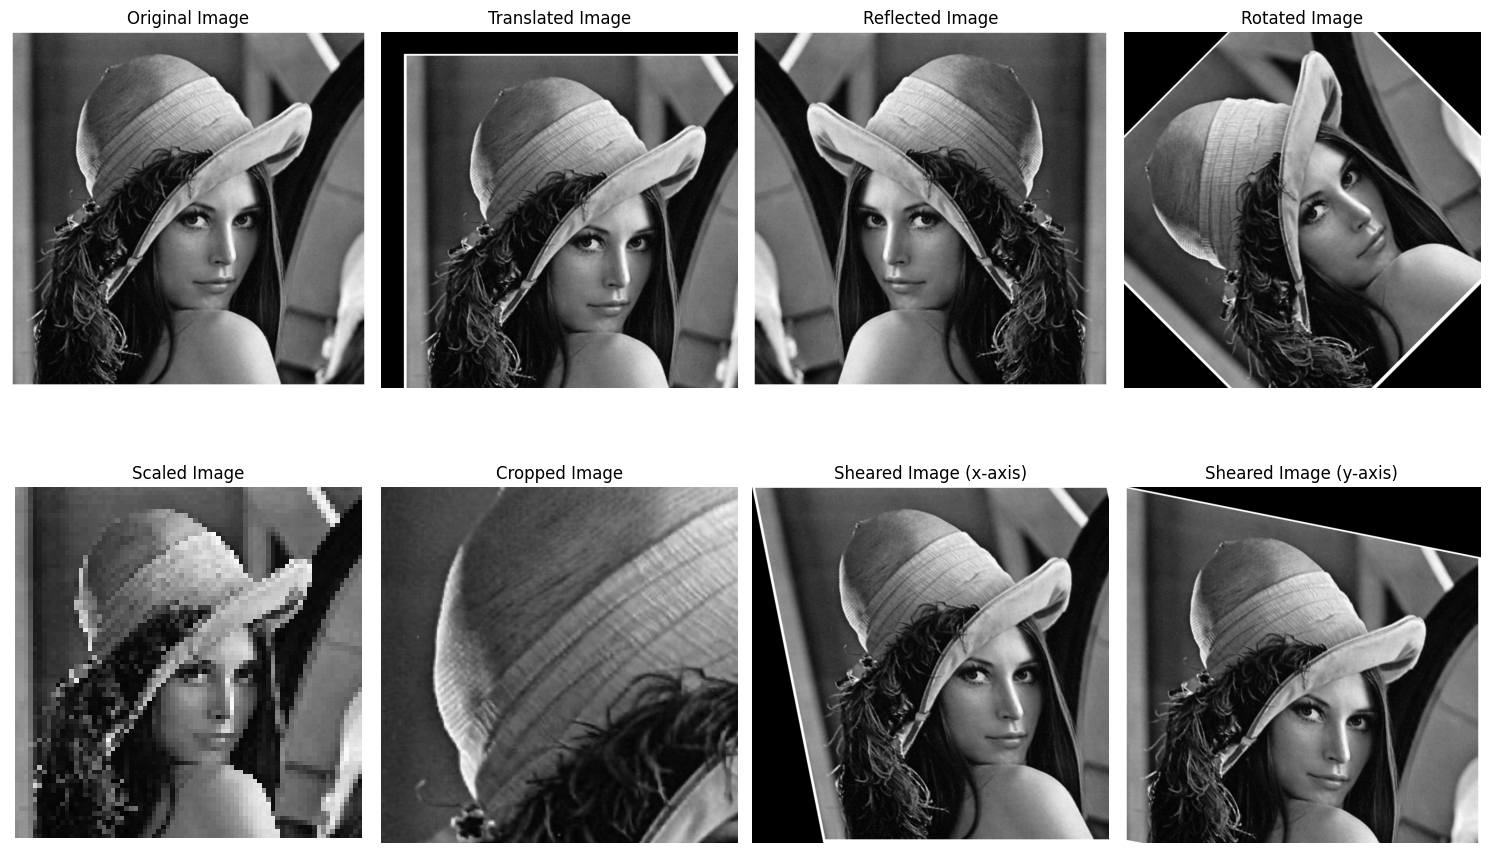

In [ ]:
# Task 2

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/picture1.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. Image Translation
def translate_image(image, tx, ty):
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (width, height))
    return translated_image

# 2. Reflection
def reflect_image(image, mode="horizontal"):
    if mode == "horizontal":
        reflected_image = cv2.flip(image, 1)  # Flip horizontally
    elif mode == "vertical":
        reflected_image = cv2.flip(image, 0)  # Flip vertically
    else:
        reflected_image = cv2.flip(image, -1)  # Flip both axes
    return reflected_image

# 3. Rotation
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

# 4. Scaling
def scale_image(image, scale_factor):
    height, width = image.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    scaled_image = cv2.resize(image, new_size)
    return scaled_image

# 5. Cropping
def crop_image(image, x_start, y_start, x_end, y_end):
    cropped_image = image[y_start:y_end, x_start:x_end]
    return cropped_image

# 6. Shearing along x-axis
def shear_image_x(image, shear_factor):
    height, width = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared_image

# 7. Shearing along y-axis
def shear_image_y(image, shear_factor):
    height, width = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared_image

# Apply transformations
translated = translate_image(image_rgb, 50, 50)  # Translate by (50, 50)
reflected = reflect_image(image_rgb, mode="horizontal")  # Reflect horizontally
rotated = rotate_image(image_rgb, 45)  # Rotate by 45 degrees
scaled = scale_image(image_rgb, 0.1)  # Scale down to 50%
cropped = crop_image(image_rgb, 100, 100, 400, 400)  # Crop to region (100, 100) to (400, 400)
sheared_x = shear_image_x(image_rgb, 0.2)  # Shear along x-axis by 0.2
sheared_y = shear_image_y(image_rgb, 0.2)  # Shear along y-axis by 0.2

# Plot results
plt.figure(figsize=(15, 10))

# Display original image
plt.subplot(2, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Translated Image
plt.subplot(2, 4, 2)
plt.imshow(translated)
plt.title("Translated Image")
plt.axis("off")

# Reflected Image
plt.subplot(2, 4, 3)
plt.imshow(reflected)
plt.title("Reflected Image")
plt.axis("off")

# Rotated Image
plt.subplot(2, 4, 4)
plt.imshow(rotated)
plt.title("Rotated Image")
plt.axis("off")

# Scaled Image
plt.subplot(2, 4, 5)
plt.imshow(scaled)
plt.title("Scaled Image")
plt.axis("off")

# Cropped Image
plt.subplot(2, 4, 6)
plt.imshow(cropped)
plt.title("Cropped Image")
plt.axis("off")

# Sheared Image (x-axis)
plt.subplot(2, 4, 7)
plt.imshow(sheared_x)
plt.title("Sheared Image (x-axis)")
plt.axis("off")

# Sheared Image (y-axis)
plt.subplot(2, 4, 8)
plt.imshow(sheared_y)
plt.title("Sheared Image (y-axis)")
plt.axis("off")

plt.tight_layout()
plt.show()